<a href="https://colab.research.google.com/github/mhabib80/Sample-Projects/blob/master/Breast_Cancer_KNeighbors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [ ]:
breast_cancer_data = load_breast_cancer()

In [ ]:
dir(breast_cancer_data)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [ ]:
print(breast_cancer_data.DESCR)

In [ ]:
breast_cancer_data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
print(breast_cancer_data.filename)

/usr/local/lib/python3.6/dist-packages/sklearn/datasets/data/breast_cancer.csv


In [ ]:
breast_cancer_data.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [ ]:
breast_cancer_data.target

In [ ]:
breast_cancer_data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
training_data, validation_data, training_labels, validation_labels = train_test_split(breast_cancer_data.data, breast_cancer_data.target, test_size=0.2, random_state=100)

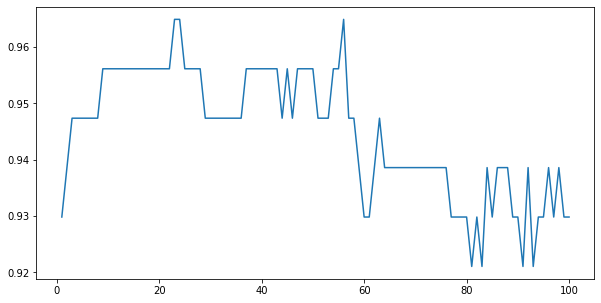

In [ ]:
k_scores = []
for k in range(1,101):
  classifier = KNeighborsClassifier(n_neighbors=k)
  classifier.fit(training_data, training_labels)
  score = classifier.score(validation_data, validation_labels)
  k_scores.append(score)

plt.figure(figsize=(10,5))
plt.plot(range(1,101), k_scores);

In [ ]:
max(k_scores)

0.9649122807017544

In [ ]:
best_k = range(1,101)[k_scores.index(max(k_scores))]
best_k

23

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=23)
classifier.fit(training_data, training_labels)
yhat = classifier.predict(validation_data)
classifier.score(validation_data, validation_labels)

0.9649122807017544

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


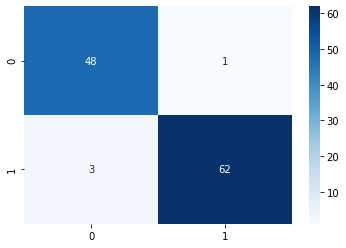

In [ ]:
from sklearn import metrics
cm = metrics.confusion_matrix(validation_labels, yhat)
import seaborn as sns
sns.heatmap(cm, cmap='Blues', annot=True);

In [ ]:
print(metrics.classification_report(validation_labels, yhat))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96        49
           1       0.98      0.95      0.97        65

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.96       114

